<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [2]:
import numpy as np


In [3]:
import pandas as pd


In [146]:
import warnings
warnings.filterwarnings('ignore')

## CSV 파일 데이터 읽어오기

In [4]:
df = pd.read_csv('../data/cust_data_v1.csv')

In [5]:
# 읽어온 데이터프레임 확인하기
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기   

- 범주형 : gender, SeniorCitizen, Partner, Dependents, PhoneService, ~~~
- 수치형 : tenure, MonthlyCharges

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 자료구조 파악

In [7]:
df.shape

(7043, 21)

## 데이터 타입, 인덱스, 컬럼명, Values 확인

## Null 데이터 확인

In [9]:
df.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

## 통계 정보

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# #3. 데이터 전처리 수행

## 자료구조 파악

## 컬럼 삭제

In [11]:
#불필요한 컬럼 삭제
df_cleaned = df.drop('DeviceProtection', axis=1)

In [12]:
df_cleaned.isnull().sum()

customerID          0
gender              9
SeniorCitizen       1
Partner             0
Dependents          2
tenure              0
PhoneService        3
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            1
PaperlessBilling    0
PaymentMethod       1
MonthlyCharges      1
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df_cleaned.shape

(7043, 20)

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7042 non-null   object 


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

- TotalCharges 컬럼 타입 변경하기

In [16]:
df_cleaned['TotalCharges'].isnull().sum()

0

In [29]:
 df[df['customerID'] == '7644-OMVMY']['TotalCharges'] = df[df['customerID'] == '7644-OMVMY']['TotalCharges']

3331     
Name: TotalCharges, dtype: object

In [34]:
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].replace(' ', np.nan)
df_cleaned['TotalCharges'].isnull().sum()
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].astype(float)
df_cleaned['TotalCharges'].isnull().sum()

11

- Churn 컬럼의 문자열값을 숫자로 변경

In [147]:
df_cleaned['Churn'] = df_cleaned['Churn'].replace({'No': 0, 'Yes': 1})

In [36]:
df_cleaned['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [37]:
df_cleaned['Churn'] = df_cleaned['Churn'].astype(int)

## Null 데이터 확인

In [38]:
df_cleaned.isnull().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges          11
Churn                  0
coluTotalChargesmn     0
dtype: int64

- 결측치 처리

데이터에 결측치 있으면 모델링시 알지 못하는 에러 발생할수 있으므로 반드시 결측치를 제거나 변경해야 한다.<br>
결측치 제거시 dropna() 함수 활용하면 된다.<br>
결측치를 변경시 변경하는 방법이 꼭 정답이 아니며, 여러가지 판단하고 고민이 필요하다.<br>
주로, 문자형 컬럼에 대해 최빈값으로 , 숫자형 컬럼에 대해 중간값으로 결측치 대신해서 채울수 있다.

In [39]:
df_cleaned = df_cleaned.dropna()

In [40]:
df_cleaned.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
coluTotalChargesmn    0
dtype: int64

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7016 entries, 1 to 7041
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7016 non-null   object 
 1   gender              7016 non-null   object 
 2   SeniorCitizen       7016 non-null   float64
 3   Partner             7016 non-null   object 
 4   Dependents          7016 non-null   object 
 5   tenure              7016 non-null   int64  
 6   PhoneService        7016 non-null   object 
 7   MultipleLines       7016 non-null   object 
 8   InternetService     7016 non-null   object 
 9   OnlineSecurity      7016 non-null   object 
 10  OnlineBackup        7016 non-null   object 
 11  TechSupport         7016 non-null   object 
 12  StreamingTV         7016 non-null   object 
 13  StreamingMovies     7016 non-null   object 
 14  Contract            7016 non-null   object 
 15  PaperlessBilling    7016 non-null   object 
 16  PaymentMeth

# #4. 시각화

## 라이브러리 임포트

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import seaborn as sns

## Bar 차트

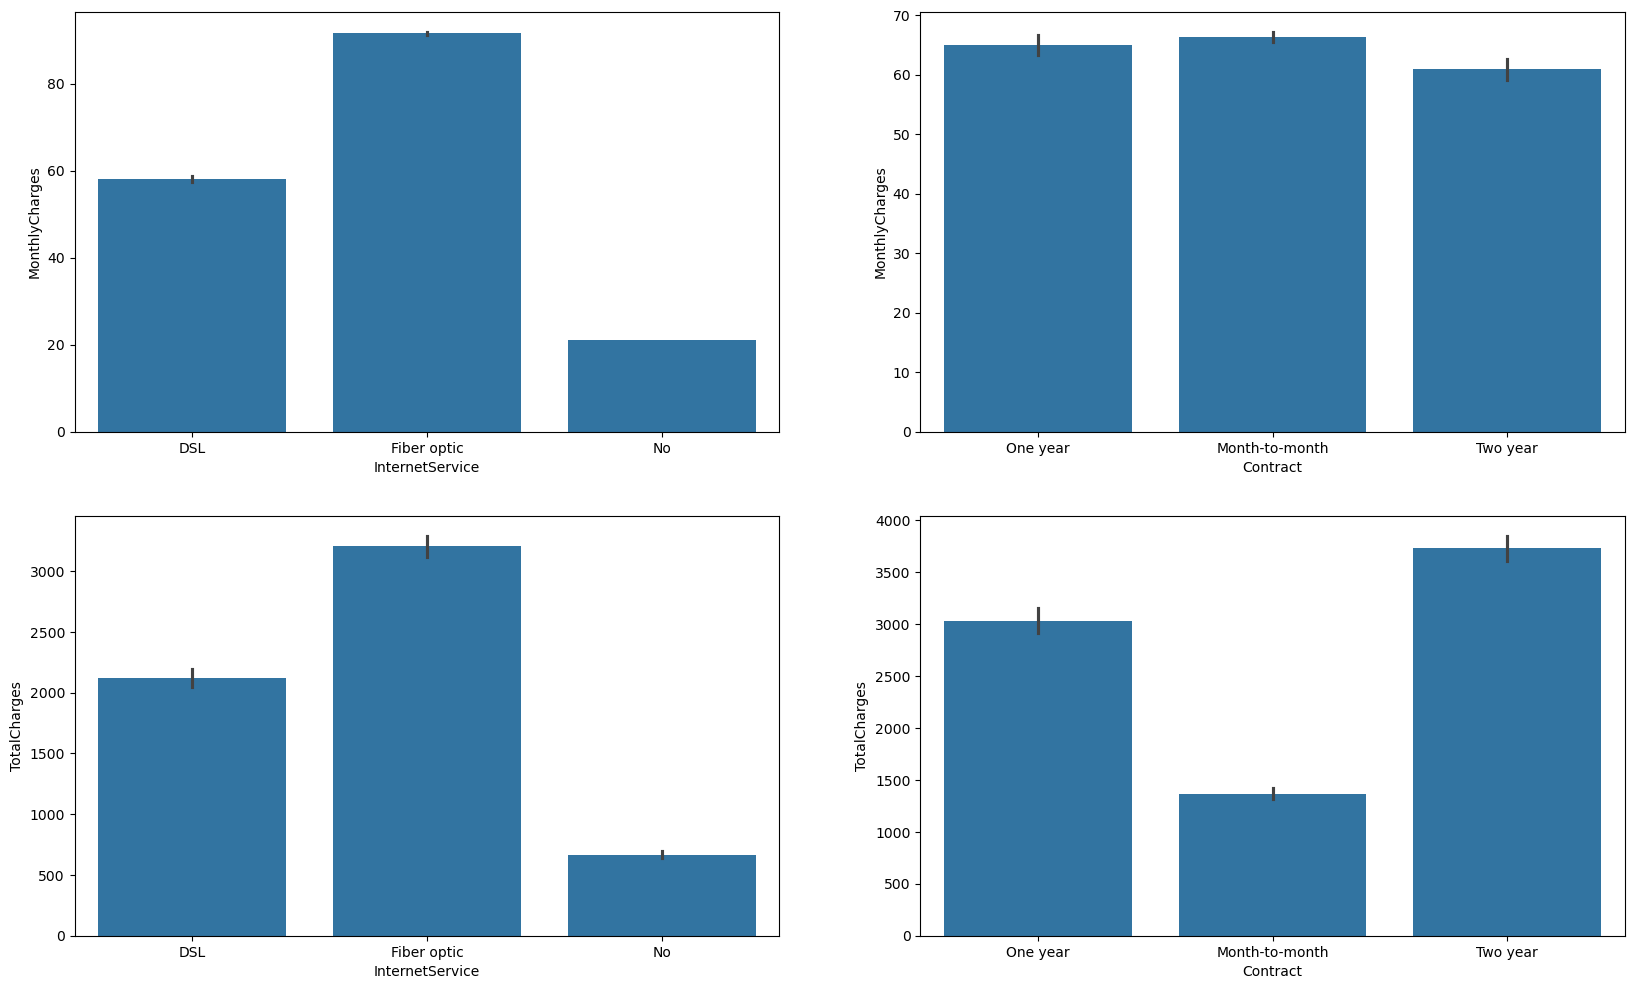

In [125]:
bar, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.barplot(data=df_cleaned, x='InternetService', y='MonthlyCharges', estimator=np.mean, ax=ax[0,0])
sns.barplot(data=df_cleaned, x='InternetService', y='TotalCharges', estimator=np.mean, ax=ax[1,0])
sns.barplot(data=df_cleaned, x='Contract', y='MonthlyCharges', estimator=np.mean, ax=ax[0,1])
sns.barplot(data=df_cleaned, x='Contract', y='TotalCharges', estimator=np.mean, ax=ax[1,1])
plt.show()

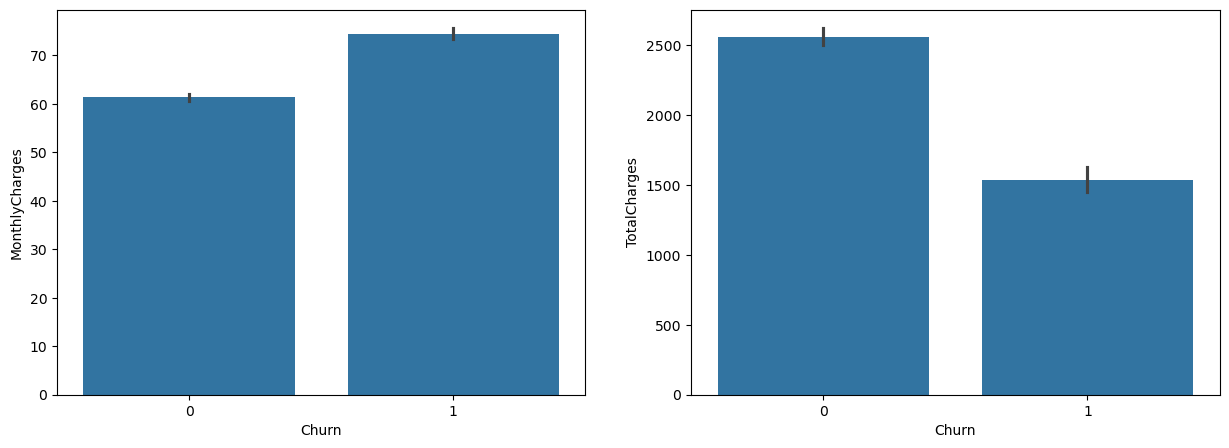

In [134]:
bar, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Churn', y='MonthlyCharges', data=df_cleaned , ax = ax[0])
sns.barplot(x='Churn', y='TotalCharges', data=df_cleaned, ax = ax[1])   # 이미 나가서 total이 적은건가..?
plt.show()

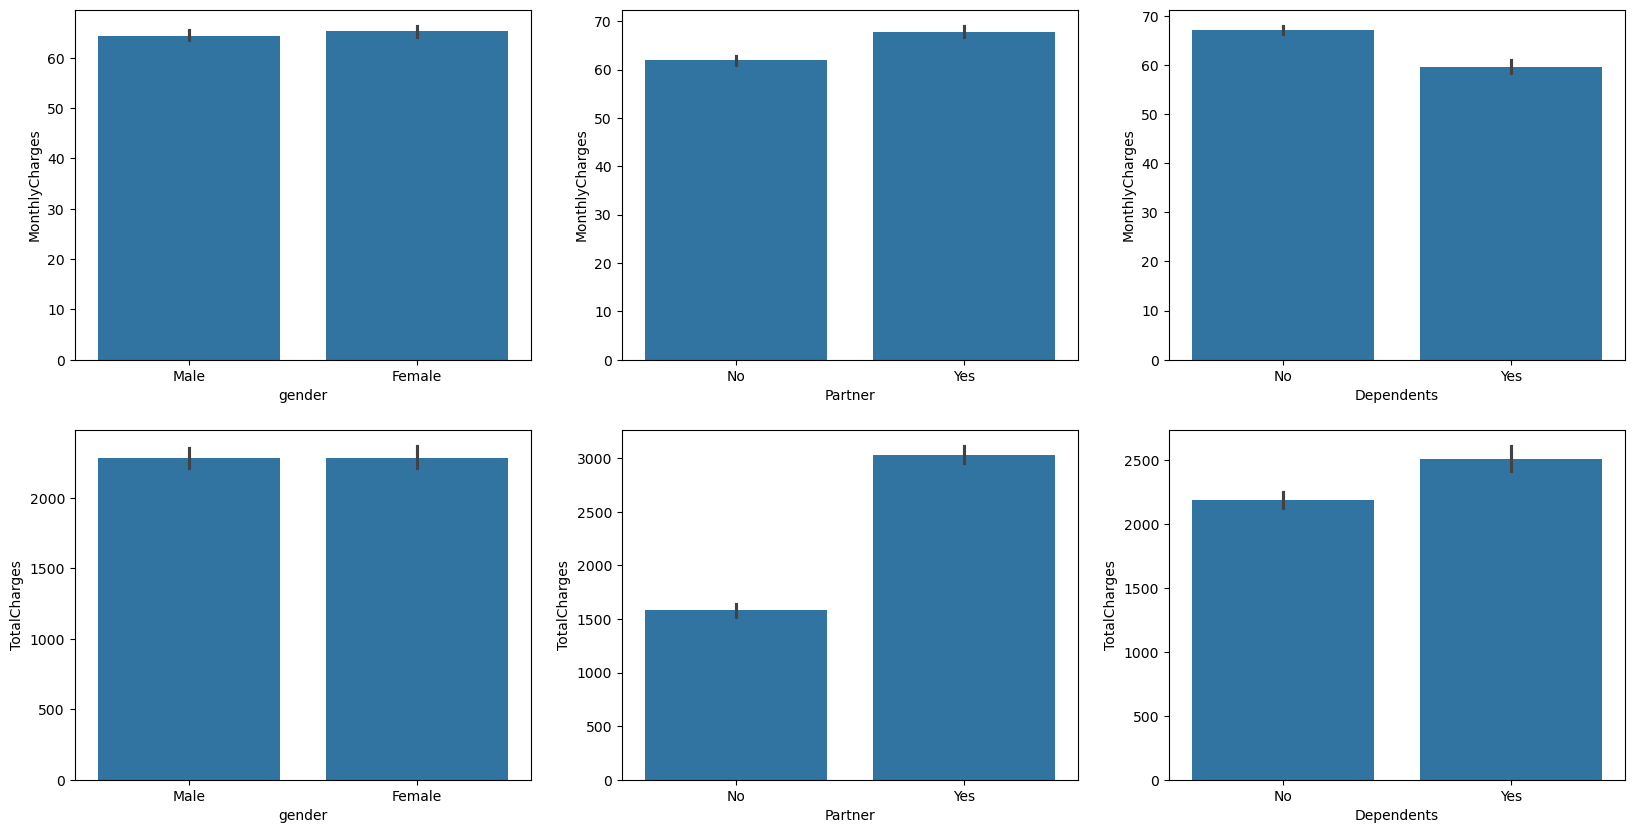

In [131]:
bar, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.barplot(data=df_cleaned, x='gender', y='MonthlyCharges', estimator=np.mean, ax=ax[0,0])
sns.barplot(data=df_cleaned, x='gender', y='TotalCharges', estimator=np.mean, ax=ax[1,0])
sns.barplot(data=df_cleaned, x='Partner', y='MonthlyCharges', estimator=np.mean, ax=ax[0,1])
sns.barplot(data=df_cleaned, x='Partner', y='TotalCharges', estimator=np.mean, ax=ax[1,1])
sns.barplot(data=df_cleaned, x='Dependents', y='MonthlyCharges', estimator=np.mean, ax=ax[0,2])
sns.barplot(data=df_cleaned, x='Dependents', y='TotalCharges', estimator=np.mean, ax=ax[1,2])
plt.show()

- 불균형 심한 PhoneService 컬럼 삭제

In [105]:
df_cleaned2 = df_cleaned.drop('PhoneService', axis=1)

## 숫자형 컬럼에 대한 시각화

In [106]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7016 entries, 1 to 7041
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7016 non-null   object 
 1   gender              7016 non-null   object 
 2   SeniorCitizen       7016 non-null   float64
 3   Partner             7016 non-null   object 
 4   Dependents          7016 non-null   object 
 5   tenure              7016 non-null   int64  
 6   MultipleLines       7016 non-null   object 
 7   InternetService     7016 non-null   object 
 8   OnlineSecurity      7016 non-null   object 
 9   OnlineBackup        7016 non-null   object 
 10  TechSupport         7016 non-null   object 
 11  StreamingTV         7016 non-null   object 
 12  StreamingMovies     7016 non-null   object 
 13  Contract            7016 non-null   object 
 14  PaperlessBilling    7016 non-null   object 
 15  PaymentMethod       7016 non-null   object 
 16  MonthlyChar

- Churn 컬럼

<Axes: xlabel='SeniorCitizen', ylabel='count'>

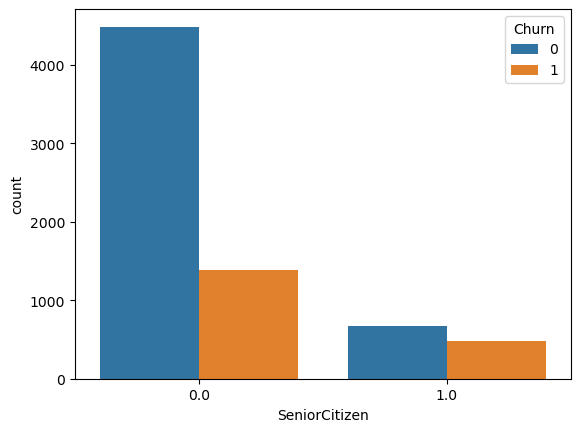

In [135]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_cleaned2)

- SeniorCitizen 컬럼

## Histgram

In [31]:
# seaborn 라이브러리 임포트
#!pip install seaborn

import seaborn as sns

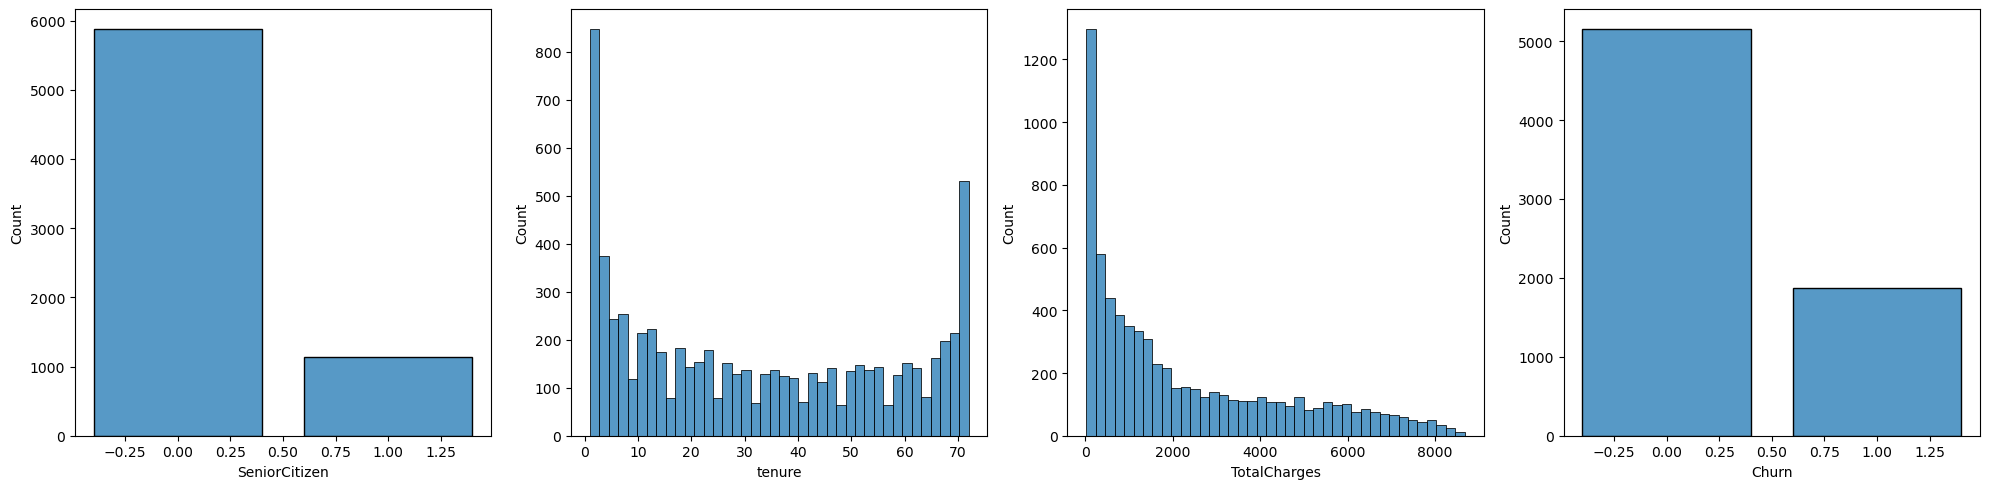

In [72]:
hist, ax = plt.subplots(1,4, figsize=(20, 5))
sns.histplot(data=df_cleaned, x='SeniorCitizen', ax = ax[0], discrete=True, shrink=.8)
sns.histplot(data=df_cleaned, x='tenure', ax = ax[1], bins=40)
sns.histplot(data=df_cleaned, x='TotalCharges', ax = ax[2], bins=40)
sns.histplot(data=df_cleaned, x='Churn', ax = ax[3], discrete=True, shrink=.8)
hist.set_tight_layout(True)
# plt.subplots_adjust(wspace=0.3)
plt.show()

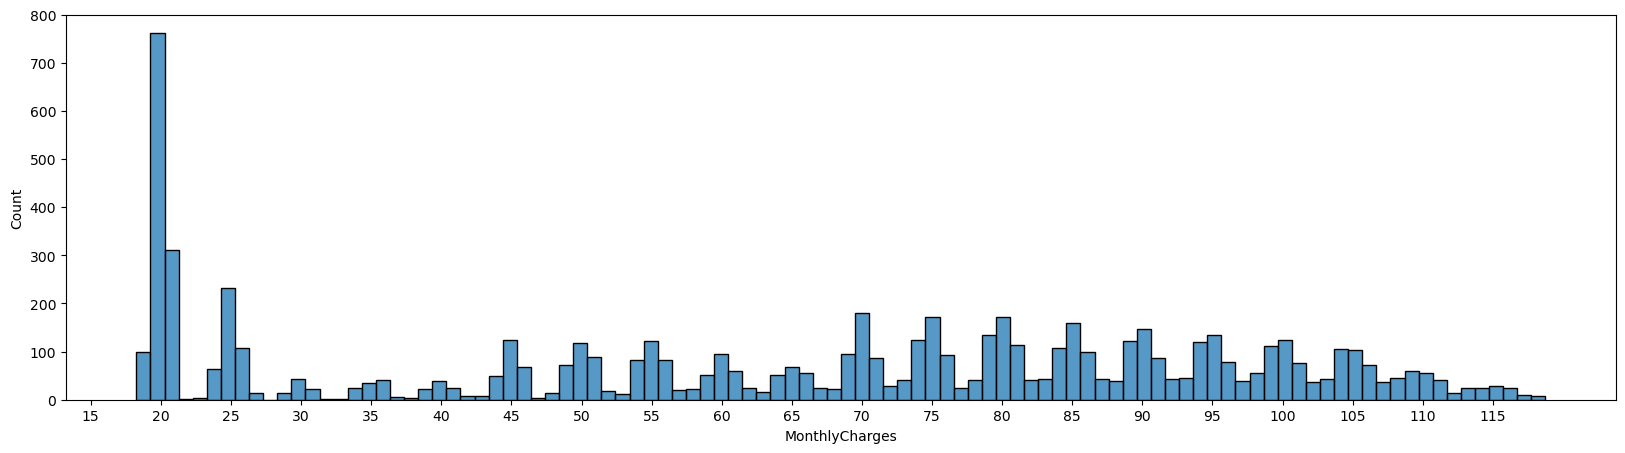

In [71]:
hist, ax = plt.subplots(1,1, figsize=(20, 5))
sns.histplot(data=df_cleaned, x='MonthlyCharges', bins=100)
min_charge = df_cleaned['MonthlyCharges'].min()
max_charge = df_cleaned['MonthlyCharges'].max()
plt.xticks(np.arange(15, max_charge+1, 5))
plt.show()

- tenure 컬럼

- TotalCharges 컬럼

## Countplot

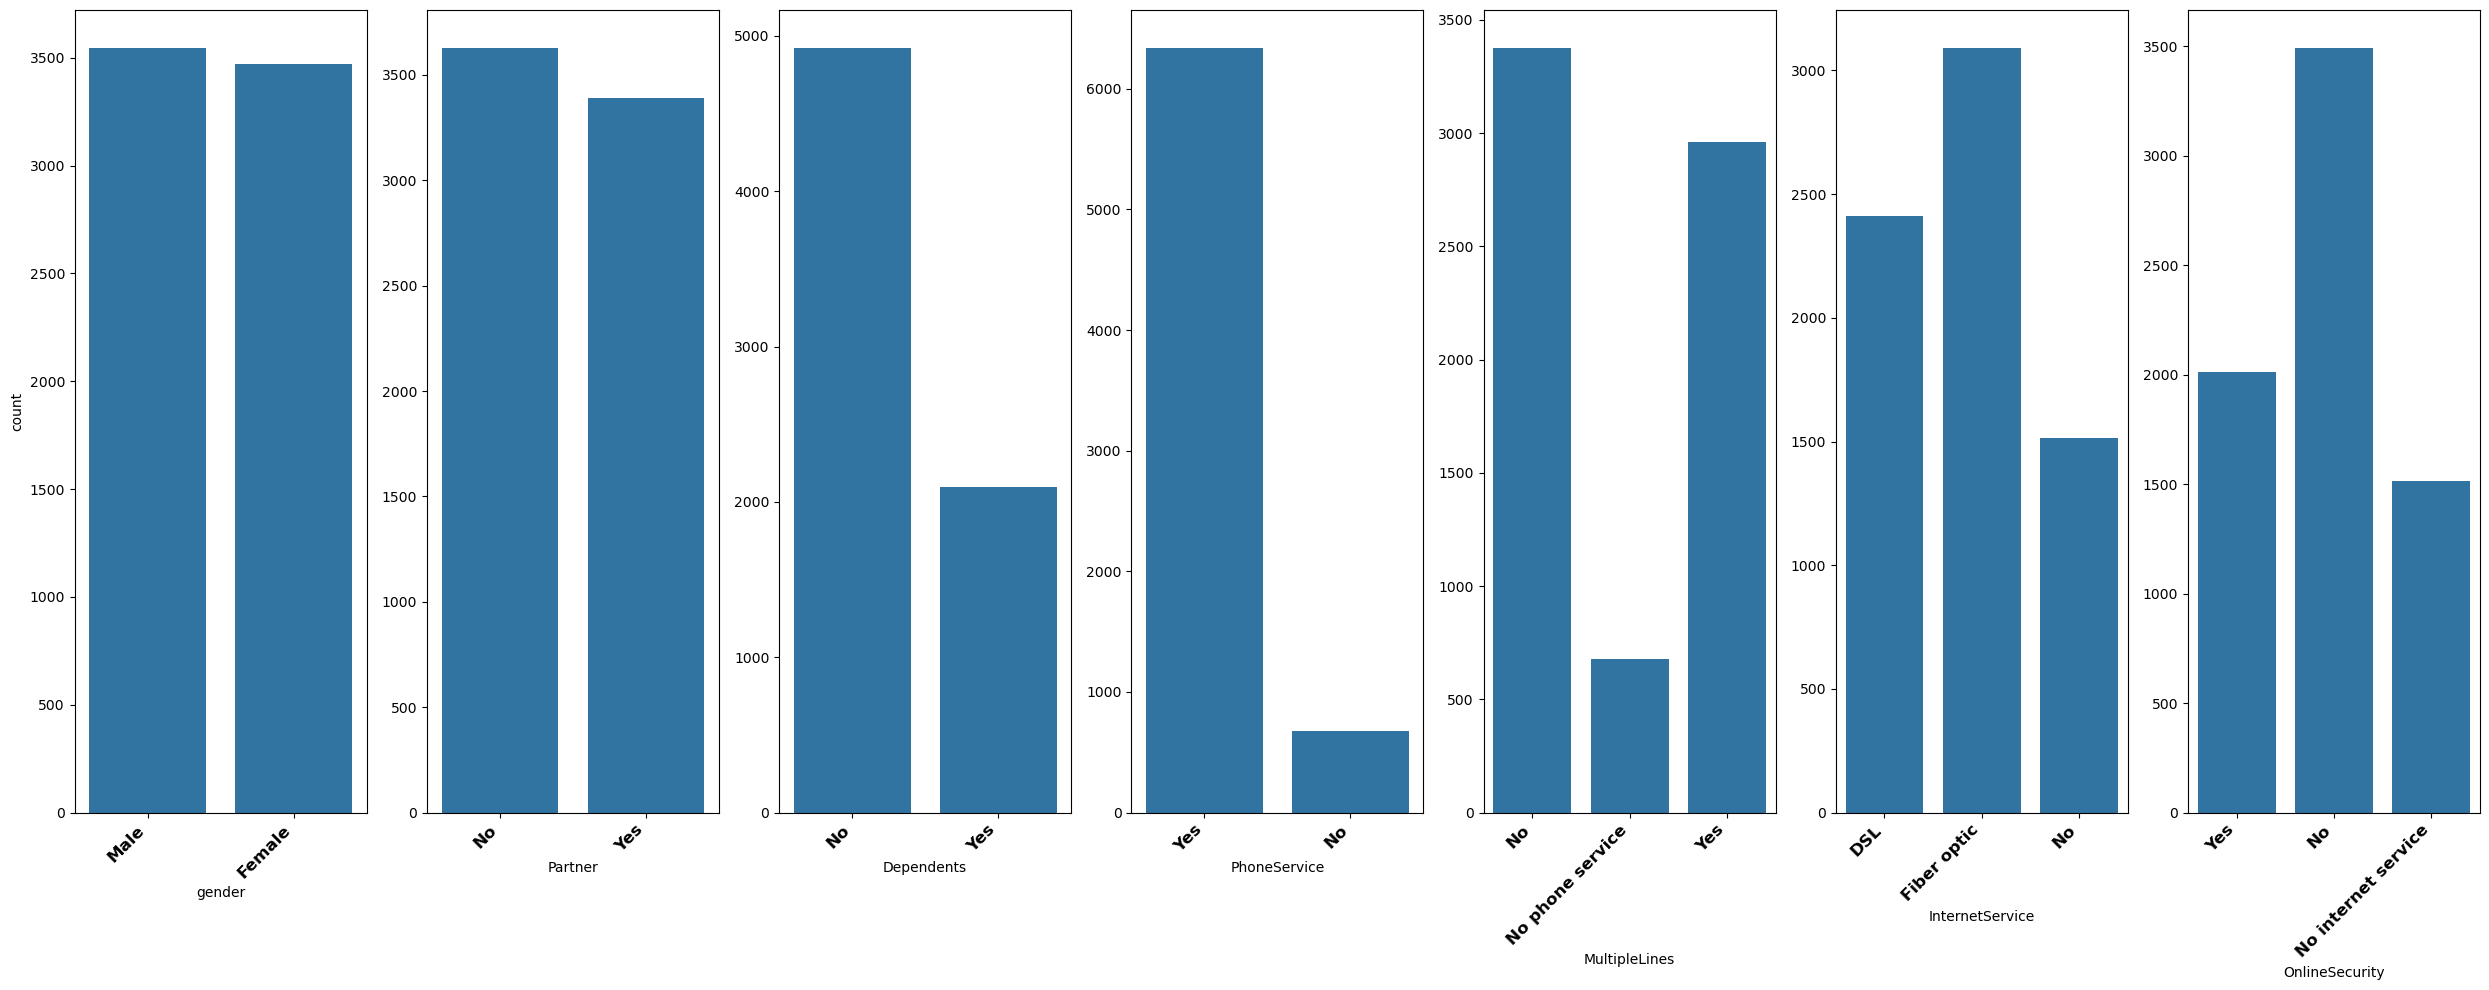

In [148]:
bar, ax = plt.subplots(1,7, figsize=(25, 10))
# sns.barplot(data=df_cleaned[['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService']])
sns.countplot(data=df_cleaned, x='gender', ax=ax[0])
sns.countplot(data=df_cleaned, x='Partner', ax=ax[1])
sns.countplot(data=df_cleaned, x='Dependents', ax=ax[2])
sns.countplot(data=df_cleaned, x='PhoneService', ax=ax[3])
sns.countplot(data=df_cleaned, x='MultipleLines', ax=ax[4])
sns.countplot(data=df_cleaned, x='InternetService', ax=ax[5])
sns.countplot(data=df_cleaned, x='OnlineSecurity', ax=ax[6])
for i in range(0,7):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=12, fontweight='bold')
    if i == 0:
        continue
    ax[i].set_ylabel('')
    
bar.set_tight_layout(True)
plt.show()

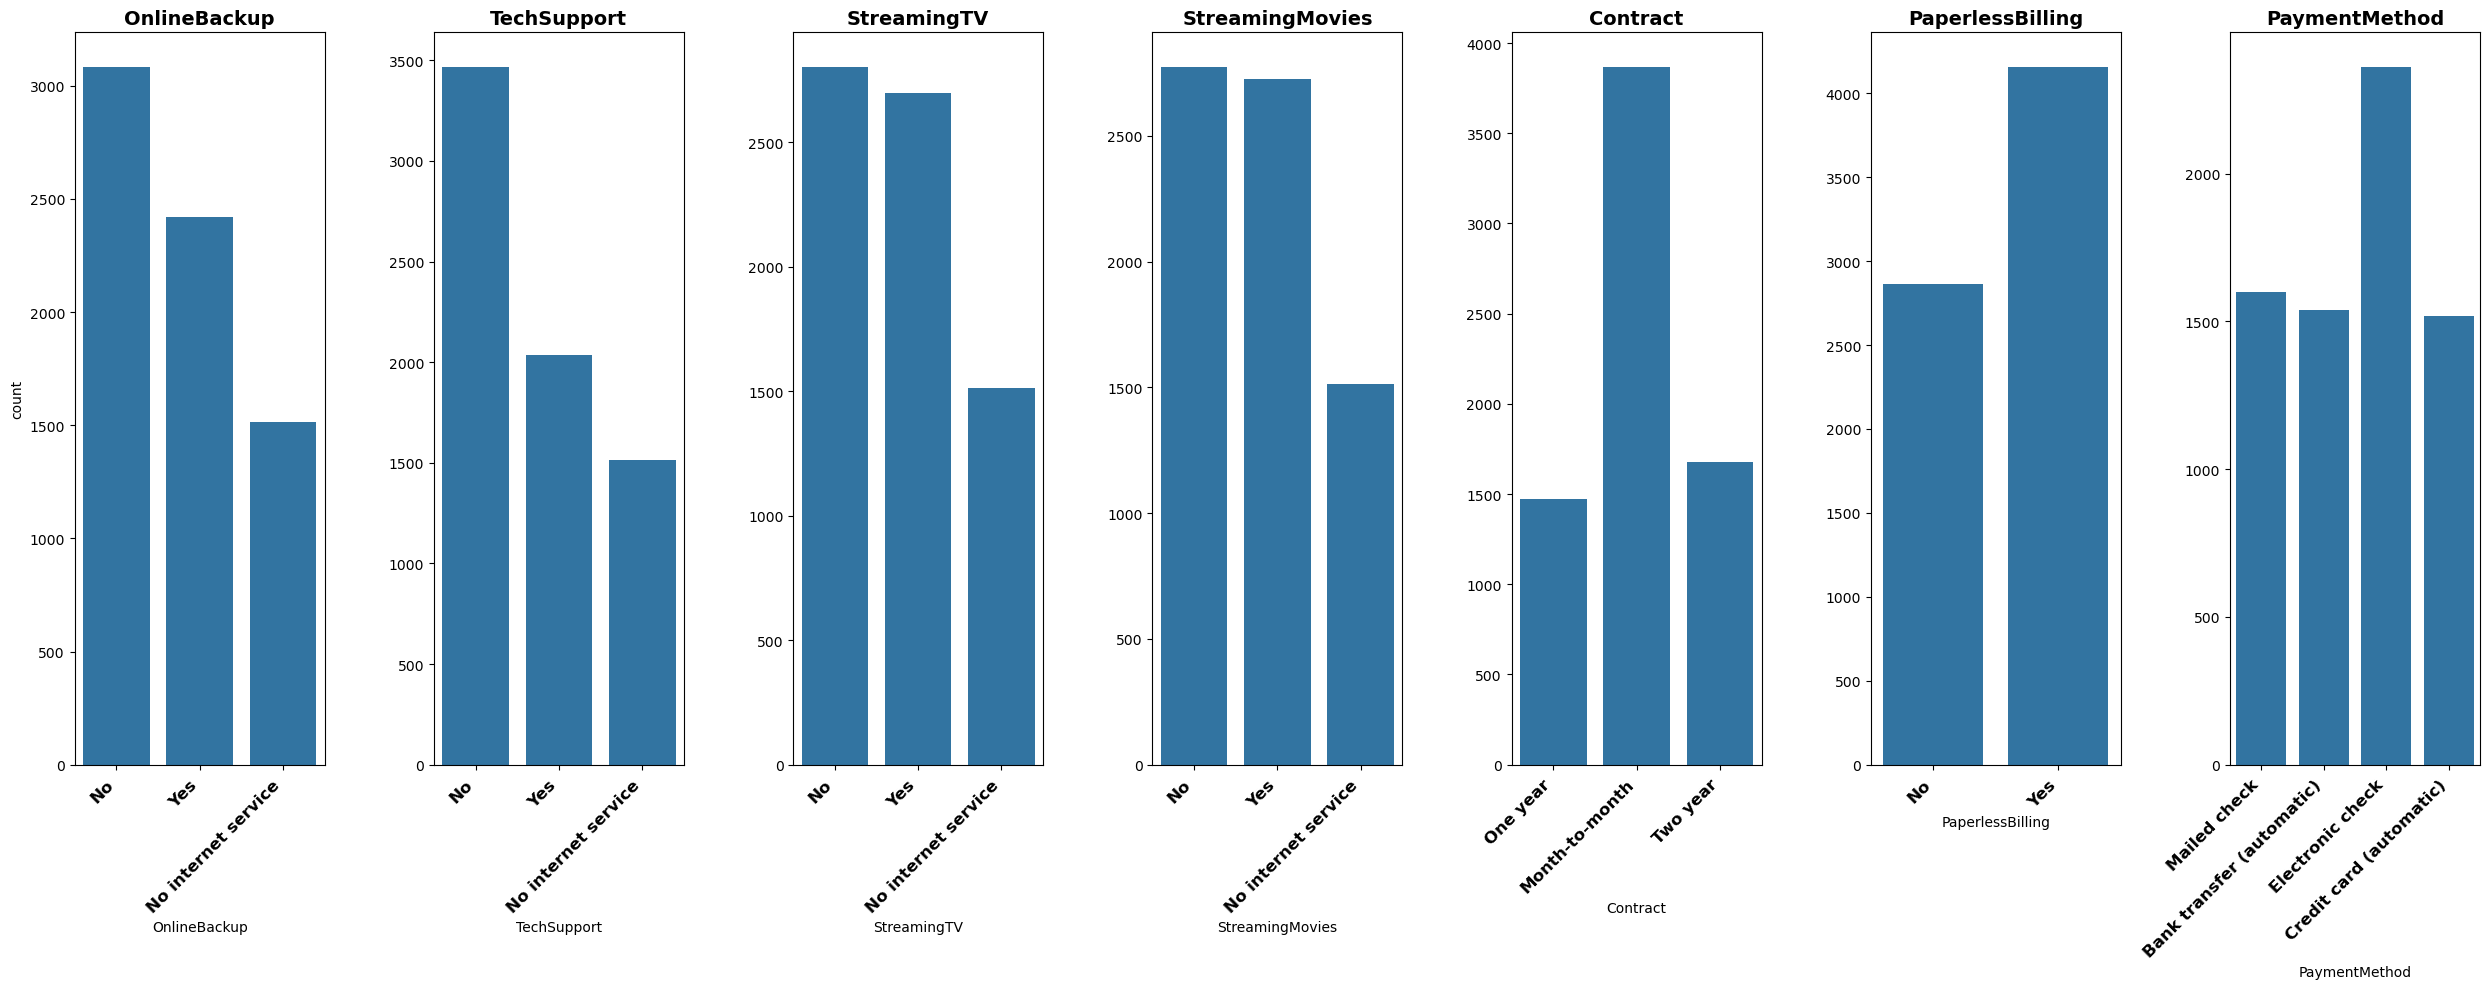

In [149]:
bar, ax = plt.subplots(1,7, figsize=(25, 10))
# sns.barplot(data=df_cleaned[['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService']])
# sns.countplot(data=df_cleaned, x='OnlineBackup', ax=ax[0])
# sns.countplot(data=df_cleaned, x='TechSupport', ax=ax[1])
# sns.countplot(data=df_cleaned, x='StreamingTV', ax=ax[2])
# sns.countplot(data=df_cleaned, x='StreamingMovies', ax=ax[3])
# sns.countplot(data=df_cleaned, x='Contract', ax=ax[4])
# sns.countplot(data=df_cleaned, x='PaperlessBilling', ax=ax[5])
# sns.countplot(data=df_cleaned, x='PaymentMethod', ax=ax[6])
columns = ['OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod']

for i, column in enumerate(columns):
    sns.countplot(data=df_cleaned, x=column, ax=ax[i])
    
    # x축 레이블 회전 및 정렬
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=12, fontweight='bold')
    
    # x축 레이블 조정
    ax[i].tick_params(axis='x', pad=5)
    
    # 제목 설정
    ax[i].set_title(column, fontsize=14, fontweight='bold')
    
    # y축 레이블 제거 (첫 번째 서브플롯 제외)
    if i != 0:
        ax[i].set_ylabel('')
bar.set_tight_layout(True)
plt.show()

## heatmap

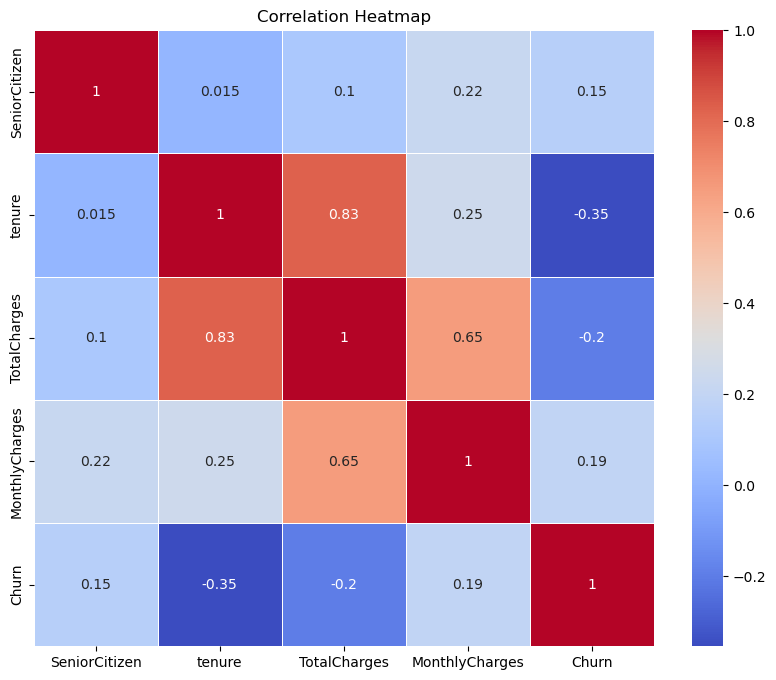

In [138]:
numeric_columns=['SeniorCitizen','tenure','TotalCharges','MonthlyCharges','Churn']
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned2[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## boxplot

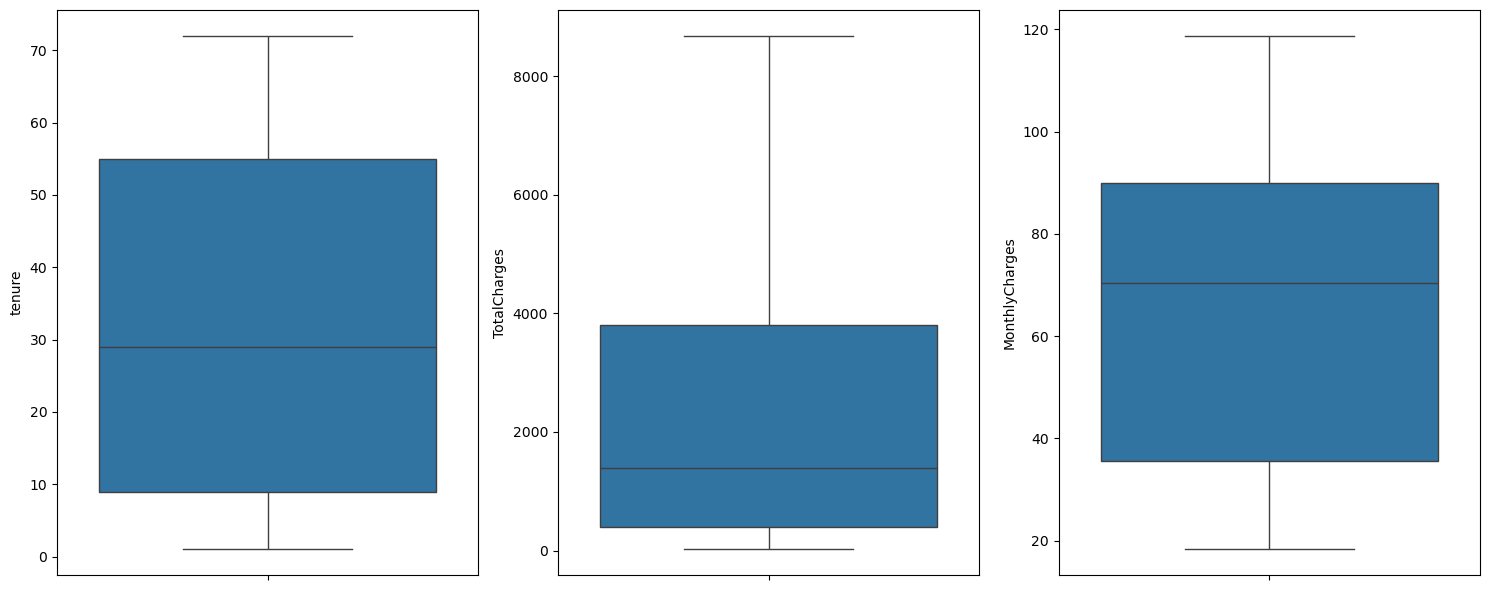

In [142]:
numeric_columns=['tenure','TotalCharges','MonthlyCharges']
box, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df_cleaned2, ax=axes[i])

box.set_tight_layout(True)
plt.show()

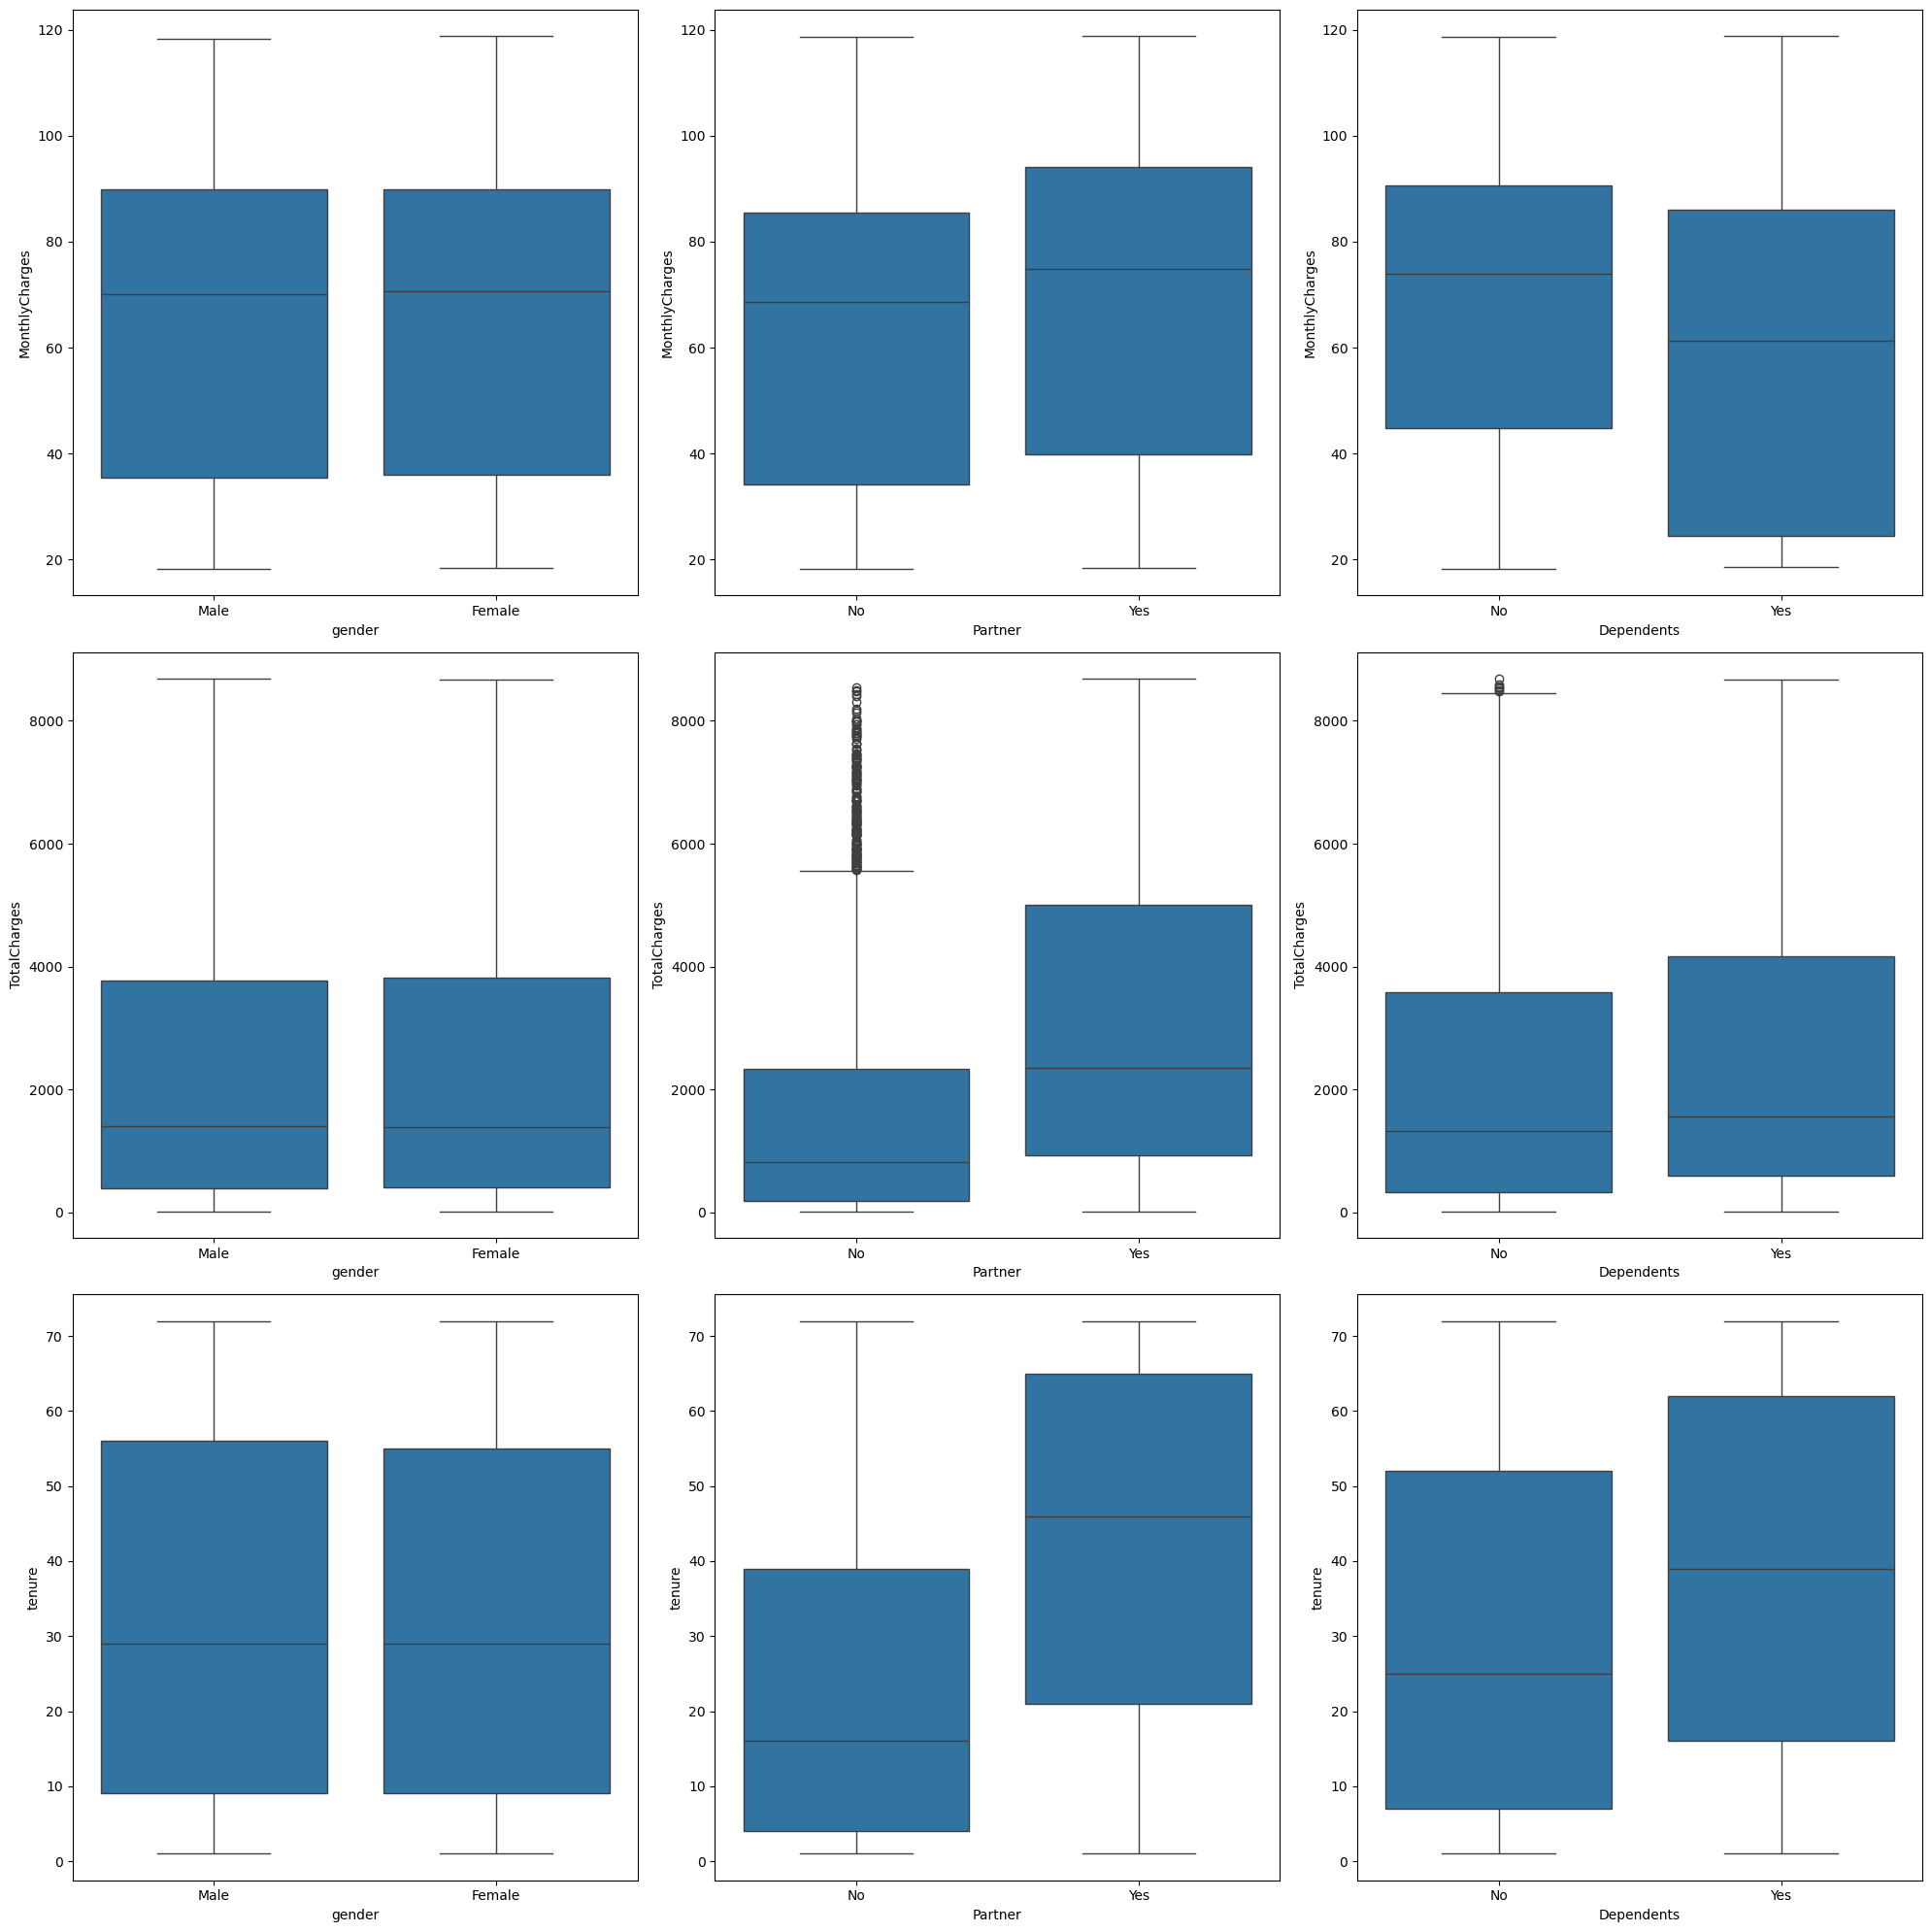

In [145]:
box, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.boxplot(data=df_cleaned2, x='gender', y='MonthlyCharges', ax=ax[0,0])
sns.boxplot(data=df_cleaned2, x='gender', y='TotalCharges', ax=ax[1,0])
sns.boxplot(data=df_cleaned2, x='gender', y='tenure', ax=ax[2,0])
sns.boxplot(data=df_cleaned2, x='Partner', y='MonthlyCharges', ax=ax[0,1])
sns.boxplot(data=df_cleaned2, x='Partner', y='TotalCharges', ax=ax[1,1])
sns.boxplot(data=df_cleaned2, x='Partner', y='tenure', ax=ax[2,1])
sns.boxplot(data=df_cleaned2, x='Dependents', y='MonthlyCharges', ax=ax[0,2])
sns.boxplot(data=df_cleaned2, x='Dependents', y='TotalCharges', ax=ax[1,2])
sns.boxplot(data=df_cleaned2, x='Dependents', y='tenure', ax=ax[2,2])
box.set_tight_layout(True)
plt.show()


# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

In [150]:
df_cleaned2.to_csv('./cust_data_v1.25_project_data_file.csv')

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()